In [1]:
import tensorflow as tf
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### keywords 30

In [2]:
# preprocessing text

from nltk.tokenize import RegexpTokenizer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk import pos_tag

def preprocess(text):
    tokenizer = RegexpTokenizer(r'\w+')
    lmtzr = WordNetLemmatizer()
    tokens = tokenizer.tokenize(text)
#     wordtags = pos_tag(tokens)
#     nouns = [word for word, pos in wordtags if (pos == 'NN')]
    wds = list(set([lmtzr.lemmatize(wd.lower(), "v") for wd in tokens if wd.lower() not in stopwords.words('english')]))
    res = ' '.join(wds)
#     print res
    return res

In [3]:
train_descripts = []

def get_description(filename, target):
    des = ''
    txtfile = open(filename, "r")
    lines = txtfile.read().split('\n')
    for line in lines:
        line = line.strip()
        if len(line) > 0:
            line = str(preprocess(line))
            des += line
            des += ' '
    target.append(des[:-1])

In [4]:
for i in range(10000):
    get_description("data/descriptions_train/" + str(i) + ".txt", train_descripts)

print(train_descripts)

['table skateboarder picnic use stage show put table skateboarder picnic pull trick top table man skateboard rid top table boarder picnic skate trick table crowd picnic watch skateboard rid person', 'shrimp noodles soup bowl carrots healthy bowl eat food ready shrimp sit soup chopsticks next carrots tasty bowl someone serve enjoy ramen shrimp asian soup bowl noodle carrots', 'walk street man across drive ice truck cream busy intersection ice behind walk cream man truck near icecream truck street man cross behind walk man concession bus', 'young boy throw grassy frisbee field young boy throw park frisbee line young boy throw park frisbee tree throw city park bright kid frisbee green grass boy throw frisbee green field', 'young yard child bat hold back baseball boy yard bat raring baseball boy yard bat little baseball boy near black bat clothe shoulder fence hold tree baseball boy yard play bat little', 'computer desk small bedroom chair bed desk bedroom sit chair brown front desk window

In [5]:
tokenizer = Tokenizer(num_words=5000, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~\t\n', lower=True)
tokenizer.fit_on_texts(train_descripts)

In [7]:
print(tokenizer.word_counts)

OrderedDict([('table', 2584), ('skateboarder', 162), ('picnic', 69), ('use', 347), ('stage', 17), ('show', 471), ('put', 99), ('pull', 281), ('trick', 335), ('top', 2131), ('man', 5909), ('skateboard', 876), ('rid', 1631), ('boarder', 41), ('skate', 258), ('crowd', 343), ('watch', 473), ('person', 2003), ('shrimp', 9), ('noodles', 25), ('soup', 61), ('bowl', 494), ('carrots', 165), ('healthy', 10), ('eat', 950), ('food', 1071), ('ready', 325), ('sit', 5528), ('chopsticks', 10), ('next', 3111), ('tasty', 25), ('someone', 224), ('serve', 188), ('enjoy', 90), ('ramen', 3), ('asian', 67), ('noodle', 4), ('walk', 1536), ('street', 2482), ('across', 300), ('drive', 394), ('ice', 74), ('truck', 603), ('cream', 55), ('busy', 194), ('intersection', 181), ('behind', 553), ('near', 1667), ('icecream', 1), ('cross', 279), ('concession', 1), ('bus', 1179), ('young', 1458), ('boy', 903), ('throw', 241), ('grassy', 399), ('frisbee', 740), ('field', 1810), ('park', 2018), ('line', 378), ('tree', 1187)

In [8]:
sequences = tokenizer.texts_to_sequences(train_descripts)
x = pad_sequences(sequences, maxlen=30)

In [9]:
print(type(x))

<class 'numpy.ndarray'>


In [10]:
print(x.shape)

(10000, 30)


In [10]:
print(x)

[[ 194  580  140 ...,   15   10   21]
 [   0    0  622 ..., 1796  622  591]
 [   0    0    0 ...,   25 4517    1]
 ..., 
 [   0    0    0 ...,   29   46  283]
 [   0    0    0 ...,    6   89  666]
 [   0    0    0 ...,   80  485  289]]


In [11]:
print(x[9999])

[   0    0    0    0    0    0 1432  113  141  186  289  113   31    1
   21  100  147    7    1  202  113  289 1432  587   12   80  113  485
  155  289]


In [12]:
print(x[0])

[  10  348  580  194 1262  140  464   10  348  580  230  202   12   10
    1   64   21   12   10  769  580  249  202   10  195  580  139   64
   21   15]


### tags 0-1

In [13]:
# read in tags
category = []
s_category = []
train_tags = []

for num in range(10000):
    path = "data/tags_train/" + str(num) + ".txt"
    txtfile = open(path, "r")
    lines = txtfile.read().split('\n')
    tags = []
    for line in lines:
        line = line.strip()
        if len(line) > 0:
            temp = line.split(":")
            c1 = temp[0]
            c2 = temp[1]
            tags.append(c2)
            if c1 not in category:
                category.append(c1)
            if c2 not in s_category:
                s_category.append(c2)
    train_tags.append(tags)
            
print(s_category)
print(train_tags)

['airplane', 'bench', 'skateboard', 'person', 'truck', 'backpack', 'handbag', 'dining table', 'bowl', 'carrot', 'spoon', 'car', 'traffic light', 'frisbee', 'baseball bat', 'bed', 'chair', 'mouse', 'keyboard', 'book', 'cup', 'tv', 'laptop', 'donut', 'bicycle', 'tie', 'bus', 'suitcase', 'baseball glove', 'stop sign', 'wine glass', 'bottle', 'clock', 'snowboard', 'cake', 'train', 'potted plant', 'cat', 'giraffe', 'motorcycle', 'bird', 'dog', 'surfboard', 'sports ball', 'fire hydrant', 'teddy bear', 'cell phone', 'tennis racket', 'sandwich', 'refrigerator', 'vase', 'horse', 'microwave', 'oven', 'broccoli', 'fork', 'umbrella', 'couch', 'remote', 'toilet', 'sink', 'knife', 'boat', 'bear', 'cow', 'zebra', 'kite', 'elephant', 'pizza', 'parking meter', 'skis', 'hot dog', 'banana', 'toothbrush', 'sheep', 'apple', 'orange', 'scissors', 'toaster', 'hair drier']
[['airplane', 'bench', 'skateboard', 'person', 'truck', 'backpack', 'handbag', 'dining table'], ['bowl', 'carrot', 'spoon'], ['car', 'truc

In [14]:
# encoding text
train_encoded_tags = []

In [15]:
def encode(total_item, cur_item, res):
    temp = np.in1d(total_item, cur_item)
    temp = temp.astype(int)
    res.append(temp)

In [16]:
for i in range(10000):
    encode(s_category, train_tags[i], train_encoded_tags)

In [17]:
y = np.array(train_encoded_tags)

In [18]:
print(y)

[[1 1 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [19]:
print(y.shape)

(10000, 80)


### 1dCNN

In [21]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=9000)

In [23]:
# don't run

from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, Flatten, GlobalMaxPool1D, Dropout, Conv1D
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from keras.losses import binary_crossentropy
from keras.optimizers import Adam

filter_length = 300
maxlen = 30
max_words = 5000
num_classes = 80

model = Sequential()
model.add(Embedding(max_words, 20, input_length=maxlen))
model.add(Dropout(0.1))
model.add(Conv1D(filter_length, 3, padding='valid', activation='relu', strides=1))
model.add(GlobalMaxPool1D())
model.add(Dense(num_classes))
model.add(Activation('sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['categorical_accuracy'])
model.summary()

callbacks = [
    ReduceLROnPlateau(),
    EarlyStopping(patience=4),
    ModelCheckpoint(filepath='model-conv1d.h5', save_best_only=True)
]

# history = model.fit(x_train, y_train,
#                     epochs=30,
#                     batch_size=32,
#                     validation_split=0.2,
#                     callbacks=callbacks)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 30, 20)            100000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 20)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 28, 300)           18300     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 300)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 80)                24080     
_________________________________________________________________
activation_1 (Activation)    (None, 80)                0         
Total params: 142,380
Trainable params: 142,380
Non-trainable params: 0
_________________________________________________________________


In [24]:
from keras.models import load_model
cnn_model = load_model('model-conv1d.h5')
metrics = cnn_model.evaluate(x_test, y_test)
print("{}: {}".format(model.metrics_names[0], metrics[0]))
print("{}: {}".format(model.metrics_names[1], metrics[1]))

  32/2000 [..............................] - ETA: 11s

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/keras/models.py:318: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


2000/2000 [==============================] - 0s 167us/step
loss: 0.05695903605222702
categorical_accuracy: 0.628


In [25]:
# get test descriptions
test_descripts = []

for i in range(2000):
    get_description("data/descriptions_test/" + str(i) + ".txt", test_descripts)

In [26]:
print(test_descripts)

['past walk street woman doorway past walk sidewalk woman doorway talk cell phone check watch woman talk cell phone check watch walk sidewalk woman build side blue wear phone entrance black walk front planters along sidewalk woman', 'sit plate food cake slice angel top large contain plate small cake slice large quarter plate cake sit plate piece cake yellow large sit upon plate slab flowery cake sponge large', 'sit traffic group light intersection shin street light sign window picture stoplight traffic sun surround light airplane several fly street light airplane overhead', 'mean side sandy uniform two rid beach horse two beach horse rid officer police lot two rid middle horse people beach ride horse officer police pair two neon vest beach horse rid people', 'booths phone pay man use adjacent woman soda machine pay use stand next outdoors adults telephone people phone couple together stand talk phone pay man woman public people talk couple phone', 'man skateboard trick blue background 

In [27]:
def get_features(text_series):
    """
    transforms text data to feature_vectors that can be used in the ml model.
    tokenizer must be available.
    """
    sequences = tokenizer.texts_to_sequences(text_series)
    return pad_sequences(sequences, maxlen=maxlen)

In [28]:
def prediction_to_label(prediction):
    tag_prob = [(s_category[i], prob) for i, prob in enumerate(prediction.tolist())]
    return dict(sorted(tag_prob, key=lambda kv: kv[1], reverse=True))

In [29]:
import pandas as pd

test_processed_data = get_features(test_descripts)

In [30]:
p1 = prediction_to_label(cnn_model.predict(np.array([test_processed_data[0]]))[0])
df = pd.DataFrame()
df['label'] = p1.keys()
df['p_cnn'] = p1.values()
df.sort_values(by='p_cnn', ascending=False)[:10]

label     p_cnn
0  cell phone  0.995470
1      person  0.994348
2     handbag  0.207181
3       chair  0.126263
4    backpack  0.095896
5      laptop  0.095804
6      bottle  0.081861
7         car  0.071077
8       truck  0.049903
9         tie  0.049465

In [31]:
p1 = prediction_to_label(cnn_model.predict(np.array([test_processed_data[15]]))[0])
df = pd.DataFrame()
df['label'] = p1.keys()
df['p_cnn'] = p1.values()
df.sort_values(by='p_cnn', ascending=False)[:10]

label     p_cnn
0         pizza  0.972125
1  dining table  0.104429
2          bowl  0.103419
3        person  0.102933
4          fork  0.071254
5           cup  0.046734
6         knife  0.036282
7        bottle  0.032493
8          oven  0.027476
9      broccoli  0.025627

In [32]:
# using train data
p1 = prediction_to_label(cnn_model.predict(np.array([x[0]]))[0])
df = pd.DataFrame()
df['label'] = p1.keys()
df['p_cnn'] = p1.values()
df.sort_values(by='p_cnn', ascending=False)[:10]

label     p_cnn
0        person  0.999967
1    skateboard  0.969410
2  dining table  0.612874
3         chair  0.374240
4         bench  0.273551
5           car  0.244772
6      backpack  0.132533
7        bottle  0.106713
8         donut  0.096361
9       handbag  0.094277

In [33]:
# get test tags
test_s_category = []
test_tags = []

for num in range(2000):
    path = "data/tags_test/" + str(num) + ".txt"
    txtfile = open(path, "r")
    lines = txtfile.read().split('\n')
    tags = []
    for line in lines:
        line = line.strip()
        if len(line) > 0:
            temp = line.split(":")
            c2 = temp[1]
            tags.append(c2)
            if c2 not in test_s_category:
                test_s_category.append(c2)
    test_tags.append(tags)
            
print(test_s_category)
print(test_tags)

['bed', 'backpack', 'suitcase', 'tie', 'cow', 'frisbee', 'person', 'car', 'traffic light', 'truck', 'cat', 'bowl', 'broccoli', 'cup', 'fork', 'pizza', 'donut', 'potted plant', 'bench', 'dining table', 'book', 'giraffe', 'laptop', 'mouse', 'keyboard', 'cell phone', 'hot dog', 'banana', 'sandwich', 'stop sign', 'snowboard', 'bus', 'skateboard', 'handbag', 'chair', 'carrot', 'kite', 'tv', 'vase', 'baseball bat', 'dog', 'boat', 'skis', 'refrigerator', 'umbrella', 'bottle', 'toothbrush', 'toilet', 'sink', 'couch', 'spoon', 'microwave', 'toaster', 'airplane', 'remote', 'bird', 'apple', 'motorcycle', 'elephant', 'clock', 'tennis racket', 'horse', 'orange', 'sports ball', 'surfboard', 'baseball glove', 'knife', 'bicycle', 'oven', 'zebra', 'wine glass', 'fire hydrant', 'teddy bear', 'sheep', 'scissors', 'cake', 'train', 'parking meter', 'bear', 'hair drier']
[['bed', 'backpack', 'suitcase', 'tie'], ['cow'], ['frisbee', 'person'], ['car', 'traffic light', 'truck'], ['cat', 'bed'], ['bowl', 'broc

In [65]:
# get predicted tags for test descriptions

predicted_tags = []

for i in range(2000):
    pred = prediction_to_label(cnn_model.predict(np.array([test_processed_data[i]]))[0])
    df = pd.DataFrame()
    df['label'] = pred.keys()
    df['p_cnn'] = pred.values()
    df = df.sort_values(by='p_cnn', ascending=False)[:10]
    temp = list(zip(df['label'], df['p_cnn']))
    predicted_tags.append(temp)

In [66]:
print(predicted_tags)

[[('cell phone', 0.9954700469970703), ('person', 0.994347870349884), ('handbag', 0.20718072354793549), ('chair', 0.1262628585100174), ('backpack', 0.09589637815952301), ('laptop', 0.0958038866519928), ('bottle', 0.08186092227697372), ('car', 0.07107678800821304), ('truck', 0.0499027781188488), ('tie', 0.04946482926607132)], [('cake', 0.9766284227371216), ('dining table', 0.5432533025741577), ('knife', 0.34404051303863525), ('fork', 0.3016815185546875), ('chair', 0.1252146065235138), ('person', 0.10592083632946014), ('bowl', 0.08023083955049515), ('hot dog', 0.05185268446803093), ('pizza', 0.04826568812131882), ('sandwich', 0.04026462510228157)], [('traffic light', 0.4577510356903076), ('car', 0.24085281789302826), ('truck', 0.0653342753648758), ('stop sign', 0.029384978115558624), ('bicycle', 0.011263322085142136), ('fire hydrant', 0.010604029521346092), ('potted plant', 0.00950219202786684), ('airplane', 0.007916944101452827), ('parking meter', 0.006643617060035467), ('bus', 0.0064161

In [58]:
one_test = predicted_tags[5]

### top 20 similar tags (self-def score func)

In [67]:
def get_similarity_score(test, samples):
    scores = []
    for sample in samples:
        score = 1
#         print(sample)
        for pair in test:
#             print(pair)
            if pair[0] in sample:
#                 print('hhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhh')
                score /= float(1 - pair[1])
            else:
                score *= float(1 - pair[1])
#             print(score)
        scores.append(score)
    return scores

In [68]:
scores = []
for pred in predicted_tags:
    scores.append(get_similarity_score(pred, test_tags))
print(len(scores))
# scores = get_similarity_score(one_test, test_tags)

2000


In [76]:
tops = []
for score in scores:    
    top_20 = np.argsort(score)[-20:]
    print(top_20)
    top_20_names = ' '.join([str(idx)+'.jpg' for idx in top_20])
    print(top_20_names)
    tops.append(top_20_names)
print(tops)

[ 206  231 1117 1892 1034  312  916  949 1883 1698 1479 1862  702  124
  483  360 1228  878  638   21]
206.jpg 231.jpg 1117.jpg 1892.jpg 1034.jpg 312.jpg 916.jpg 949.jpg 1883.jpg 1698.jpg 1479.jpg 1862.jpg 702.jpg 124.jpg 483.jpg 360.jpg 1228.jpg 878.jpg 638.jpg 21.jpg
[ 956  562  473 1489 1071 1757 1099 1411  635 1907  150 1597  265 1753
 1174  282  608 1824 1219  348]
956.jpg 562.jpg 473.jpg 1489.jpg 1071.jpg 1757.jpg 1099.jpg 1411.jpg 635.jpg 1907.jpg 150.jpg 1597.jpg 265.jpg 1753.jpg 1174.jpg 282.jpg 608.jpg 1824.jpg 1219.jpg 348.jpg
[ 765 1512  115 1573  322    3  663  117  511  539 1119 1242  634  781
 1896 1272  979  106  310 1883]
765.jpg 1512.jpg 115.jpg 1573.jpg 322.jpg 3.jpg 663.jpg 117.jpg 511.jpg 539.jpg 1119.jpg 1242.jpg 634.jpg 781.jpg 1896.jpg 1272.jpg 979.jpg 106.jpg 310.jpg 1883.jpg
[ 654 1035 1922 1865 1486   75  397 1514  469  799  800  836 1716  930
 1609  872 1748  390 1769 1315]
654.jpg 1035.jpg 1922.jpg 1865.jpg 1486.jpg 75.jpg 397.jpg 1514.jpg 469.jpg 799.jpg 8

[ 510 1603  601 1757  473 1489  562  956 1411 1174 1099  150 1753  635
 1219  265 1597  282  348  608]
510.jpg 1603.jpg 601.jpg 1757.jpg 473.jpg 1489.jpg 562.jpg 956.jpg 1411.jpg 1174.jpg 1099.jpg 150.jpg 1753.jpg 635.jpg 1219.jpg 265.jpg 1597.jpg 282.jpg 348.jpg 608.jpg
[ 916 1411 1559  702 1120 1262  811   12 1937 1679 1526  859  118 1941
 1201  789 1822  169 1803 1146]
916.jpg 1411.jpg 1559.jpg 702.jpg 1120.jpg 1262.jpg 811.jpg 12.jpg 1937.jpg 1679.jpg 1526.jpg 859.jpg 118.jpg 1941.jpg 1201.jpg 789.jpg 1822.jpg 169.jpg 1803.jpg 1146.jpg
[ 811 1120 1262 1965  540 1369 1317 1339  916   68 1565  360  702 1284
 1737 1201 1941  789 1822 1692]
811.jpg 1120.jpg 1262.jpg 1965.jpg 540.jpg 1369.jpg 1317.jpg 1339.jpg 916.jpg 68.jpg 1565.jpg 360.jpg 702.jpg 1284.jpg 1737.jpg 1201.jpg 1941.jpg 789.jpg 1822.jpg 1692.jpg
[1359 1246   18  945   41 1670  543  488  395 1221 1175 1498 1271  580
 1506  819 1800  812  974 1548]
1359.jpg 1246.jpg 18.jpg 945.jpg 41.jpg 1670.jpg 543.jpg 488.jpg 395.jpg 122

[ 462  847  252 1146  525 1770   40  839 1914 1399  193  635 1751 1317
 1548 1034 1474 1142 1843  100]
462.jpg 847.jpg 252.jpg 1146.jpg 525.jpg 1770.jpg 40.jpg 839.jpg 1914.jpg 1399.jpg 193.jpg 635.jpg 1751.jpg 1317.jpg 1548.jpg 1034.jpg 1474.jpg 1142.jpg 1843.jpg 100.jpg
[1549  276  863  507  919  580  810  242 1015 1593  672  977   95 1986
  622  271   22  735 1868 1474]
1549.jpg 276.jpg 863.jpg 507.jpg 919.jpg 580.jpg 810.jpg 242.jpg 1015.jpg 1593.jpg 672.jpg 977.jpg 95.jpg 1986.jpg 622.jpg 271.jpg 22.jpg 735.jpg 1868.jpg 1474.jpg
[1871    5  200   61 1226 1785 1199 1981 1353 1116 1835 1645 1794  179
  515 1733 1723  201 1049 1824]
1871.jpg 5.jpg 200.jpg 61.jpg 1226.jpg 1785.jpg 1199.jpg 1981.jpg 1353.jpg 1116.jpg 1835.jpg 1645.jpg 1794.jpg 179.jpg 515.jpg 1733.jpg 1723.jpg 201.jpg 1049.jpg 1824.jpg
[1770 1111  282  296 1381 1806   76  529 1411 1174  428  587  225  916
 1559 1201 1735 1822  789 1941]
1770.jpg 1111.jpg 282.jpg 296.jpg 1381.jpg 1806.jpg 76.jpg 529.jpg 1411.jpg 1174.jp

781.jpg 634.jpg 1573.jpg 310.jpg 663.jpg 979.jpg 1896.jpg 1272.jpg 1883.jpg 1482.jpg 826.jpg 1752.jpg 1906.jpg 1168.jpg 660.jpg 1067.jpg 675.jpg 456.jpg 834.jpg 928.jpg
[1046  224 1683 1170  162 1756 1935 1631  119  164 1323  776 1374 1659
 1942 1858 1585 1293 1548  462]
1046.jpg 224.jpg 1683.jpg 1170.jpg 162.jpg 1756.jpg 1935.jpg 1631.jpg 119.jpg 164.jpg 1323.jpg 776.jpg 1374.jpg 1659.jpg 1942.jpg 1858.jpg 1585.jpg 1293.jpg 1548.jpg 462.jpg
[  33  718 1582  903 1333 1933 1191  767 1444 1377 1940 1096 1470  623
  583  667  391  899  367 1311]
33.jpg 718.jpg 1582.jpg 903.jpg 1333.jpg 1933.jpg 1191.jpg 767.jpg 1444.jpg 1377.jpg 1940.jpg 1096.jpg 1470.jpg 623.jpg 583.jpg 667.jpg 391.jpg 899.jpg 367.jpg 1311.jpg
[1316 1519  252 1963  108  839 1592  227 1781   38 1597 1034  870  635
 1770 1548 1447  100 1142 1843]
1316.jpg 1519.jpg 252.jpg 1963.jpg 108.jpg 839.jpg 1592.jpg 227.jpg 1781.jpg 38.jpg 1597.jpg 1034.jpg 870.jpg 635.jpg 1770.jpg 1548.jpg 1447.jpg 100.jpg 1142.jpg 1843.jpg
[ 313  2

[1834  669 1644  221  377  982 1336  260 1365  749  873 1611  765 1183
 1197  928  979 1883 1896 1272]
1834.jpg 669.jpg 1644.jpg 221.jpg 377.jpg 982.jpg 1336.jpg 260.jpg 1365.jpg 749.jpg 873.jpg 1611.jpg 765.jpg 1183.jpg 1197.jpg 928.jpg 979.jpg 1883.jpg 1896.jpg 1272.jpg
[ 570 1572 1269 1178   81 1262  132 1749  947 1558 1166  199  216  608
 1945  702 1671  965 1462 1542]
570.jpg 1572.jpg 1269.jpg 1178.jpg 81.jpg 1262.jpg 132.jpg 1749.jpg 947.jpg 1558.jpg 1166.jpg 199.jpg 216.jpg 608.jpg 1945.jpg 702.jpg 1671.jpg 965.jpg 1462.jpg 1542.jpg
[1900 1488  987  685 1961 1085  756  136  907 1305 1949  975 1857 1302
 1772  415 1223 1022   91  794]
1900.jpg 1488.jpg 987.jpg 685.jpg 1961.jpg 1085.jpg 756.jpg 136.jpg 907.jpg 1305.jpg 1949.jpg 975.jpg 1857.jpg 1302.jpg 1772.jpg 415.jpg 1223.jpg 1022.jpg 91.jpg 794.jpg
[ 402 1312  429  903 1191  767 1444 1933 1333  583 1940 1377  623 1096
 1470  667 1311  367  899  391]
402.jpg 1312.jpg 429.jpg 903.jpg 1191.jpg 767.jpg 1444.jpg 1933.jpg 1333.jpg 5

In [77]:
import csv

out_files = []
for i in range(2000):
    out_files.append(str(i)+'.txt')
with open('cnn.csv', 'w') as f:
    writer = csv.writer(f)
    writer.writerows(zip(out_files, tops))

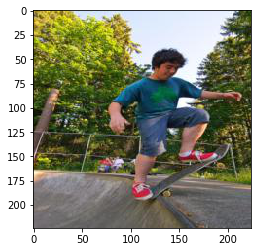

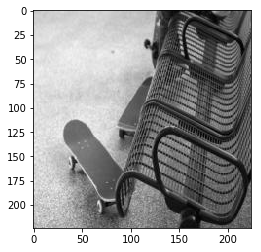

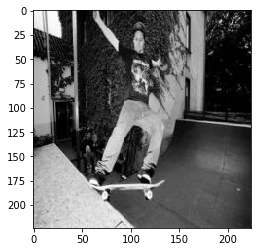

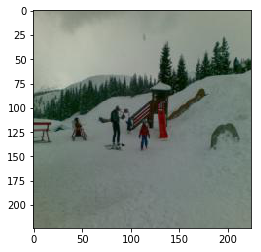

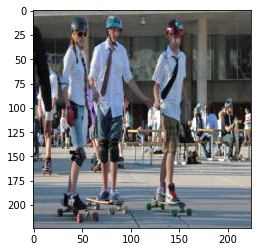

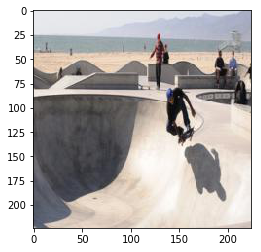

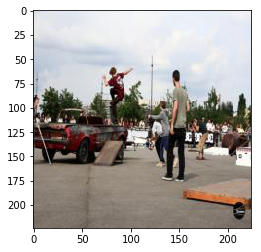

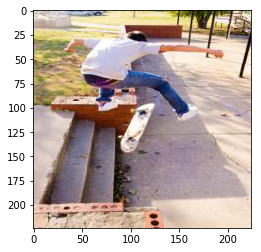

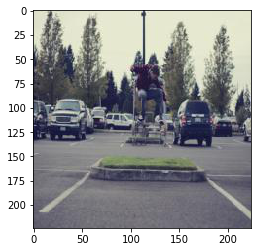

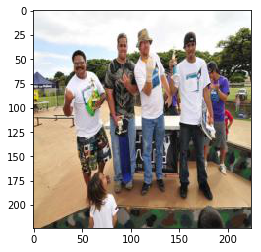

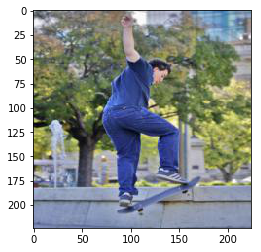

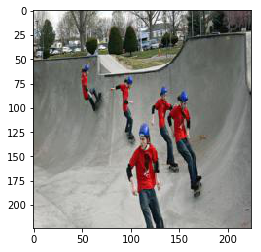

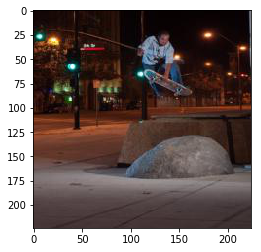

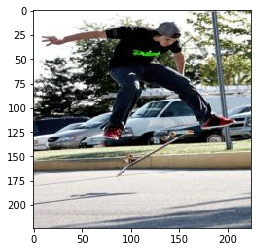

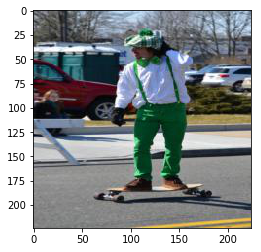

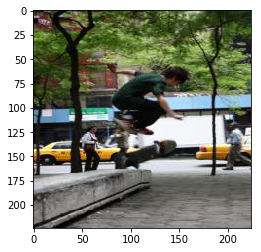

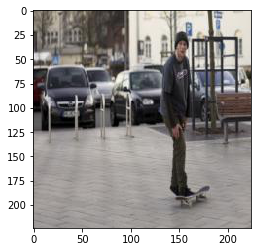

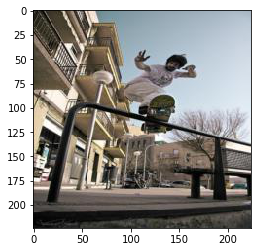

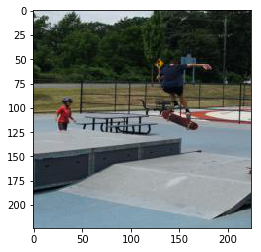

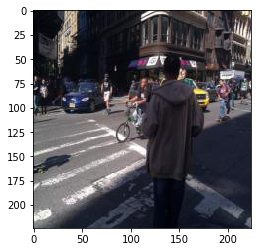

In [80]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

path = '/Users/sjx/Desktop/CS5785/final/data/images_test/'
top_names = tops[5].split(' ')
for name in top_names:
    img=mpimg.imread(path+name)
    imgplot = plt.imshow(img)
    plt.show()
        